<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo"  />
    </a>
</p>


# **Credit Card Fraud Detection using Scikit-Learn and Snap ML**


Estimated time needed: **30** minutes


**Snap ML** is a high-performance IBM library for ML modeling. It provides highly-efficient CPU/GPU implementations of linear models and tree-based models. Snap ML not only accelerates ML algorithms through system awareness, but also offers novel ML algorithms with best-in-class accuracy. For more information, please visit [here](https://ibm.biz/BdPfdW?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01).


In this guided project you will consolidate your machine learning (ML) modeling skills by using two popular classification models to recognize fraudulent credit card transactions. These models are: **Decision Tree and Support Vector Machine**. You will use a real dataset to train each of these models. The dataset includes information about transactions made by credit cards in September 2013 by European cardholders. You will use the trained model to assess if a credit card transaction is legitimate or not.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0RHPEN/images/creditcard.jpg" width="70%">


## Table of Contents


<ol>
    <li><a href="#introduction">Introduction</a></li>
    <li><a href="#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li><a href="#Introduction">Introduction</a></li>
    <li><a href="#dataset_analysis">Dataset Analysis</a></li>
    <li><a href="#dataset_preprocessing">Dataset Preprocessing</a></li>
    <li><a href="#dataset_split">Dataset Train/Test Split</a></li>
    <li><a href="#Decision Trees">Decision Trees</a>
        <ol>
            <li><a href="#dt_sklearn">Build a Decision Tree Classifier with Scikit-Learn</a></li>
            <li><a href="#dt_snap">Build a Decision Tree Classifier with Snap ML</a></li>
            <li><a href="#dt_sklearn_snap">Evaluate the Scikit-Learn and Snap ML Decision Tree Classifiers</a></li>                     
        </ol>           
    </li>
    <li><a href="#Support Vector Machines">Support Vector Machines</a>
        <ol>
             <li><a href="#svm_sklearn">Build a Support Vector Machine model with Scikit-Learn</a></li>
            <li><a href="#svm_snap">Build a Support Vector Machine model with Snap ML</a></li>
            <li><a href="#svm_sklearn_snap">Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</a></li>            
        </ol>                
    </li>
</ol>


## Objectives


After completing this lab you will be able to:


* Perform basic data preprocessing in Python
* Model a classification task using the Scikit-Learn and Snap ML Python APIs
* Train Suppport Vector Machine and Decision Tree models using Scikit-Learn and Snap ML
* Run inference and assess the quality of the trained models


----


## Setup


For this guided project, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
# Import the libraries we need to use in this lab
import warnings
warnings.filterwarnings('ignore')

# from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

import time
import gc, sys

## Introduction


Imagine that you work for a financial institution and part of your job is to build a model that predicts if a credit card transaction is fraudulent or not. You can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).


As a Data Scientist, you have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).

To train the model you can use part of the input dataset and the remaining data can be used to assess the quality of the trained model. First, let's download the dataset. 

The dataset is the [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01) dataset from Kaggle.


In [2]:
import skillsnetwork
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0RHPEN/data/creditcard.tgz", overwrite=True)

  0%|          | 0/2 [00:00<?, ?it/s]

Saved to '.'


## Dataset Analysis


In this section you will read the dataset in a Pandas dataframe and visualize its content. You will also look at some data statistics. 

Note: A Pandas dataframe is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure. For more information, click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01). 


In [3]:
# read the input data
raw_data = pd.read_csv('creditcard.csv')
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, we will inflate the original one 10 times.


In [4]:
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called `Class` and represents the target variable. Your objective will be to train a model that uses the other variables to predict the value of the `Class` variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymize as V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature `Class` is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01).


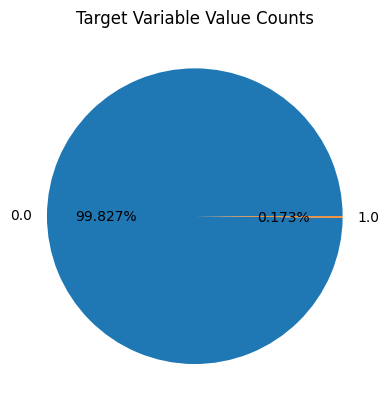

In [5]:
# get the set of distinct classes
labels = big_raw_data.Class.unique()

# get the count of each class
sizes = big_raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

As shown above, the Class variable has two values:

- 0 (the credit card transaction is legitimate)  
- 1 (the credit card transaction is fraudulent)

Thus, you need to model a binary classification problem. Moreover, **the dataset is highly unbalanced**, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at training time is to _bias the model to pay more attention to the samples in the minority class_. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.


### Practice


The credit card transactions have different amounts. Could you plot a histogram that shows the distribution of these amounts? What is the range of these amounts (min/max)? Could you print the 90th percentile of the amount values?


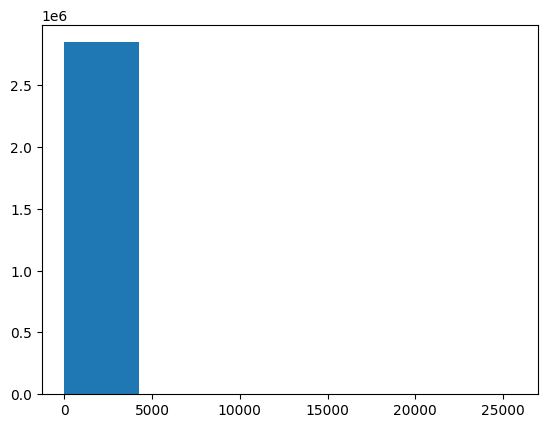

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [6]:
big_raw_data['Amount'].hist(bins=6, grid=False)
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

## Dataset Preprocessing


Data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence. We standardize features by removing the mean and scaling to unit variance.


In [7]:
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


We are dealing with a large dataset, thus we need to make sure we do not run out of memory. We can release the memory occupied by `raw_data` and `big_raw_data` as we do not need them anymore.


In [8]:
del raw_data
del big_raw_data
gc.collect()

3636

<div id="dataset_split">
    <h2>Dataset Train/Test Split</h2>
</div>


Now that the dataset is ready for building the classification models, you need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


## Decision Trees


Let's first use Decision Trees for the problem and evaluate the performance of the classifiers from Scikit-learn and Snap ML.


<div id="dt_sklearn">
    <h3>Build a Decision Tree Classifier with Scikit-Learn</h3>
</div>


We compute the `sample_weights` to be used as input to the training routine so that it takes into account the class imbalance present in this dataset.


In [10]:
w_train = compute_sample_weight('balanced', y_train)

Import the Decision Tree Classifier Model from scikit-learn:


In [11]:
from sklearn.tree import DecisionTreeClassifier

For reproducible output across multiple function calls, set `random_state` to a given integer value:


In [12]:
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

Train a Decision Tree Classifier using scikit-learn and use the function **time** to record the training time of our Decision Tree model.


In [13]:
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  20.32423


<div id="dt_snapml">
    <h3>Build a Decision Tree Classifier with Snap ML</h3>
</div>


Let's import the Decision Tree Classifier Model from **Snap ML**. We can reuse the same sample weights we computed before using the Scikit-learn's `compute_sample_weight` function for training the Decision Tree from Snap ML. The seamless integration of the Snap ML library is possible due to its Scikit-learn Python API compatibility.


Import the Decision Tree Classifier Model from Snap ML:


In [14]:
from snapml import DecisionTreeClassifier

Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn. To use the GPU, set the parameter `use_gpu = True`:

`snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)`


To set the number of CPU threads used at training time, set the `n_jobs` parameter. For reproducible output across multiple function calls, set `random_state` to a given integer value.


In [15]:
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4, use_gpu=True)

Train a Decision Tree Classifier from Snap ML and use the function **time** to record the training time.


In [16]:
# train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  2.93707


<div id="dt_sklearn_snapml">
    <h3>Evaluate the Scikit-Learn and Snap ML Decision Tree Classifiers</h3>
</div>


Let's examine the Snap ML vs Scikit-Learn training speedup for the Decision Tree Classifier:


In [17]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 6.92x 


Let's run inference on both classifiers and compute the probabilities of the test samples belonging to the class of fraudulent transactions. 


In [18]:
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

We evaluate the Compute Area Under the Receiver Operating Characteristic Curve, the **ROC-AUC score** of the predictions of both classifiers:


In [19]:
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


As shown above, both Decision Tree classifiers provide the same score on the test dataset. 

However Snap ML runs the training routine multiple times faster than Scikit-Learn. This is one of the advantages of using Snap ML: **acceleration of training of classical machine learning models, such as linear and tree-based models**. For more Snap ML examples, please visit [here](https://ibm.biz/BdPfxB?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01).


## Support Vector Machines


We now use the Support Vector Machine (SVM) models for the problem and evaluate the performance of the models from Scikit-learn and Snap ML.


<div id="svm_sklearn">
    <h3>Build a Support Vector Machine model with Scikit-Learn</h3>
</div>


Import the linear Support Vector Machine (SVM) model from Scikit-Learn:


In [20]:
from sklearn.svm import LinearSVC

Instatiate a scikit-learn SVM model. To indicate the class imbalance at training time, set `class_weight='balanced'`.


In [21]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

Train a linear Support Vector Machine model using Scikit-Learn:


In [22]:
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  58.41


<div id="svm_snap">
    <h3>Build a Support Vector Machine model with Snap ML</h3>
</div>


Import the Support Vector Machine model (SVM) from Snap ML:


In [23]:
from snapml import SupportVectorMachine

In contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs. To use the GPU, set `use_gpu = True`. To set the number of threads used at training time, one needs to set the `n_jobs` parameter.


In [24]:
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False, use_gpu=True)
print(snapml_svm.get_params())

{'class_weight': 'balanced', 'device_ids': [], 'fit_intercept': False, 'gamma': 1.0, 'generate_training_history': None, 'intercept_scaling': 1.0, 'kernel': 'linear', 'loss': 'hinge', 'max_iter': 1000, 'n_components': 100, 'n_jobs': 4, 'normalize': False, 'random_state': 25, 'regularizer': 1.0, 'tol': 0.001, 'use_gpu': True, 'verbose': False}


Train an SVM model using Snap ML:


In [25]:
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  6.44


<div id="svm_sklearn_snap">
    <h3>Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</h3>
</div>


Let's examine the Snap ML vs Scikit-Learn training speedup for the SVM models:


In [26]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 9.07x 


Let's run inference on both models and get the confidence scores of the test samples. 


In [27]:
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred = snapml_svm.decision_function(X_test)

We evaluate the **ROC-AUC score** of the predictions of both models:


In [28]:
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.984


As shown above both SVM models provide the same score on the test dataset. However, as in the case of Decision Trees, Snap ML runs the training routine faster than Scikit-Learn. For more Snap ML examples, please visit [here](https://ibm.biz/BdPfxB?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01). 

Moreover, as shown above, not only is Snap ML seemlessly accelerating scikit-learn applications, but the library's Python API is also compatible with scikit-learn metrics and data preprocessors.


### Practice


In this practice you will:

- Run inference on the test set using both Scikit-Learn and Snap ML models. 
- Evaluate the quality of the SVM models trained above using the [hinge loss metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01). 
- Compute and print the hinge loss metric for both sets of predictions **(the two models should give the similar Hinge loss)**.


In [29]:
from sklearn.metrics import hinge_loss

# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

# evaluate the hinge loss metric for Sklearn
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_sklearn))

# evaluate the hinge loss for Snap ML
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

[Scikit-Learn] Hinge loss:   0.234
[Snap ML] Hinge loss:   0.233


## Authors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01)

[Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera35714171-2022-01-01)


Andreea Anghel


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2022-10-03  | 0.1  | Roxanne Li  |  Created Guided Project|


Copyright © 2022 IBM Corporation. All rights reserved.
